In [1]:
%matplotlib inline
import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import cv2
import torch
import torchvision
import PIL
from src.dataset.trans.data import *
from src.dataset.loader import *
from src.visualizer.draw import *

## 1. Build transition dataset 
Given correct paths to the orignal annotations of JAAD, PIE and TITAN, build dataset using `TransDataset`. Please follow the default form of file paths. <br>
<b> Note </b>: Only provide the paths for the datasets to be used. `TransDataset` works normally with arbitrary combination of supported datasets.

In [2]:
anns_paths = {'JAAD': {'anns': 'DATA/annotations/JAAD/JAAD_DATA.pkl', 
                 'split': 'DATA/annotations/JAAD/split_ids'},
         'PIE': {'anns': 'DATA/annotations/PIE/PIE_DATA.pkl'},
         'TITAN': {'anns': 'DATA/annotations/TITAN/titan_0_4',
                   'split':'DATA/annotations/TITAN/splits' }
         }
trans_data = TransDataset(data_paths=anns_paths, image_set="train", verbose=False)

Use `extract_trans_history()` to collect transition instancesï¼š

In [3]:
samples = trans_data.extract_trans_history(mode='STOP', fps=10, verbose=True)

Extract 609 STOP history samples from train dataset,
samples contain 539 unique pedestrians and 33647 frames.


## 2. Data loading
Use `SequenceDataset` (`torch.utils.data.Dataset`) for reading sequential images and annotations.

In [4]:
image_dir = r'C:\Users\Dongxu Guo\Documents\GitHub\VITA_project_test\DATA\images'
sequences = SequenceDataset(samples, image_dir=image_dir, preprocess=None)

Now let's viualize the loaded data. Note the frame sequence is in the form of <b>stacked tensor</b>.

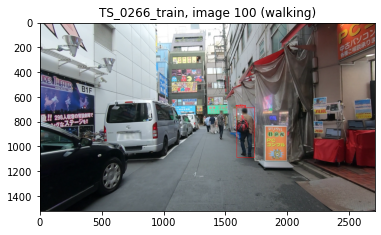

In [17]:
history_sample = sequences.__getitem__(604) # choose one history sample
k = 100 # choose one frame
bbox = history_sample['bbox'][k]
action = history_sample['action'][k]
s = 'walking' if action else 'standing'
img_tensor = history_sample['image'][k]
pid = history_sample['id']
Tensor2PIL = torchvision.transforms.ToPILImage(mode='RGB')
pil_img = Tensor2PIL(img_tensor)
cv2_img = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)
image = draw_ped_ann(cv2_img, bbox, action)
plt.title(f'{pid}, image {k} ({s})')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB),aspect='equal')